<a href="https://colab.research.google.com/github/Abhishek-Khanna24/machine-learning/blob/main/ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
plt.style.use('fivethirtyeight')

In [40]:
#Load Data
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from pandas_datareader import data
start_date = '2019-01-01'
#end_date = '2019-10-01'
end_date = '2020-01-01'
SRC_DATA_FILENAME='msft_data_large.csv'
msft_data = data.DataReader('T', 'yahoo', start_date, end_date)
#msft_data.to_pickle(SRC_DATA_FILENAME)
msft_data.to_csv(SRC_DATA_FILENAME)
msft_data.to_pickle('seb.pkl')
msft_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,29.590000,28.299999,28.500000,29.540001,39294000.0,26.012018
2019-01-03,29.809999,29.209999,29.520000,29.580000,37603600.0,26.047237
2019-01-04,30.379999,29.889999,29.959999,30.340000,42072400.0,26.716471
2019-01-07,31.270000,30.420000,30.730000,30.889999,41070900.0,27.200781
2019-01-08,31.379999,31.030001,31.309999,31.280001,43567300.0,27.544209


In [41]:
msft_data_test = msft_data.iloc[:189,:]

In [42]:
#Calculating SMA, Upper and Lower Bolinger Band

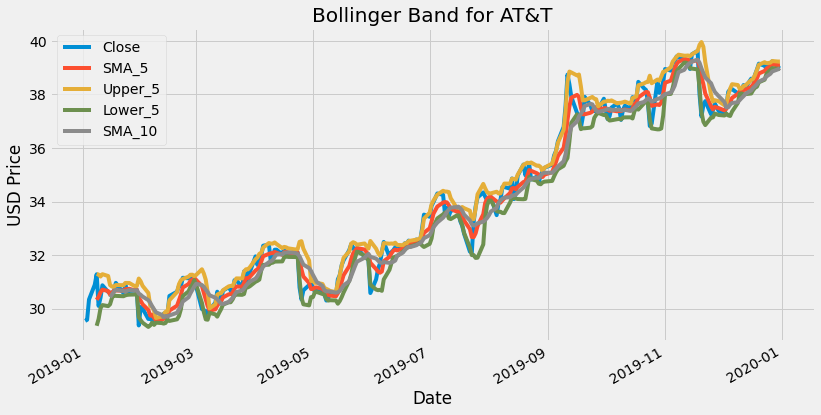

In [43]:
period_1 = 5
msft_data['SMA_5'] = msft_data['Close'].rolling(window=period_1).mean()
msft_data['STD_5'] = msft_data['Close'].rolling(window=period_1).std()
msft_data['Upper_5'] = msft_data['SMA_5'] + 1.25*(msft_data['STD_5'])
msft_data['Lower_5'] = msft_data['SMA_5'] - 1.25*(msft_data['STD_5'])
period_2 = 10
msft_data['SMA_10'] = msft_data['Close'].rolling(window=period_2).mean()

column_list = ['Close', 'SMA_5','Upper_5','Lower_5','SMA_10']
msft_data[column_list].plot(figsize=(12.2,6.4))
plt.title('Bollinger Band for AT&T')
plt.ylabel('USD Price')
plt.show()


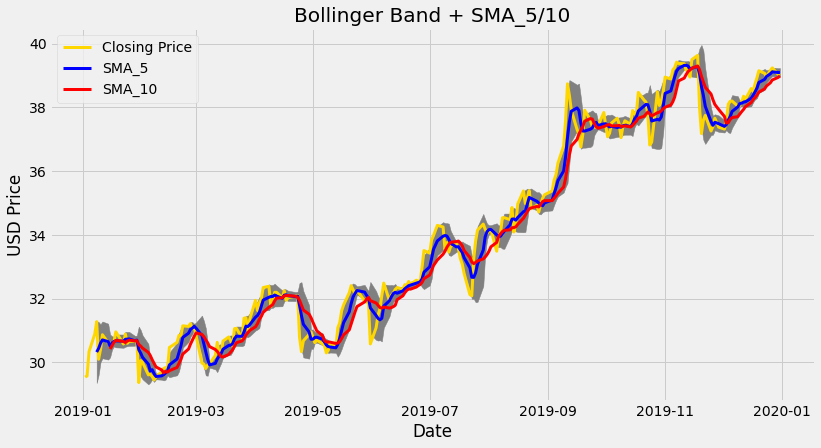

In [44]:
fig = plt.figure(figsize=(12.2,6.4))
ax = fig.add_subplot(1,1,1)
x_axis = msft_data.index
ax.fill_between(x_axis,msft_data['Upper_5'],msft_data['Lower_5'], color = 'grey')
ax.plot(x_axis, msft_data['Close'], color = 'gold', lw=3, label = 'Closing Price')
ax.plot(x_axis, msft_data['SMA_5'], color = 'blue', lw=3, label = 'SMA_5')
ax.plot(x_axis, msft_data['SMA_10'], color = 'red', lw=3, label = 'SMA_10')
column_list_2 = ['Close', 'SMA_5','SMA_10']
ax.set_title('Bollinger Band + SMA_5/10')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price')
ax.legend()
plt.show()


In [45]:
new_df = msft_data[period_2 -1:]

In [46]:
new_df.head()

,High,Low,Open,Close,Volume,Adj Close,SMA_5,STD_5,Upper_5,Lower_5,SMA_10
Date,,,,,,,,,,,
2019-01-15,30.600000,30.23,30.520000,30.600000,26735400.0,27.392029,30.518,0.287089,30.876862,30.159139,30.422
2019-01-16,30.750000,30.35,30.530001,30.559999,24494400.0,27.356222,30.610,0.169116,30.821395,30.398605,30.524
2019-01-17,30.750000,30.41,30.549999,30.639999,26267000.0,27.427834,30.658,0.122148,30.810685,30.505315,30.630
2019-01-18,31.030001,30.52,30.820000,30.959999,43249100.0,27.714287,30.676,0.161493,30.877866,30.474134,30.692
2019-01-22,30.990000,30.42,30.920000,30.580000,37658500.0,27.374126,30.668,0.165891,30.875364,30.460636,30.661


In [47]:
cond_1 = new_df['SMA_5'] > new_df['SMA_10']
new_df['Signal_1'] = np.where(cond_1,1,0)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
new_df['Signal_2'] = np.nan

for index, row in new_df.iterrows():

  if row['Close']> row['Upper_5']:
    new_df.loc[index, 'Signal_2'] = 0
  elif row['Close'] < row['Lower_5']:
    new_df.loc[index, 'Signal_2'] = 1
  else:
    new_df.loc[index, 'Signal_2'] = 0.5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [49]:
current_shares = 0
our_values1 = []
current_value = 1000
can_buy = 1 
#0 means cannot buy, 1 means can buy
can_sell = 0
#0 means cannot sell, 1 means can sell

for index,row in new_df.iloc[:189,:].iterrows():

  if can_buy == 0:
    print("Held")
    print(current_value)
    current_value = row['Close']*current_shares
    our_values1.append(current_value)
    if can_sell ==0:
      print("Did nothing")

  if row['Signal_1'] == 1 and can_buy==1:
    can_buy = 0
    can_sell = 1
    current_shares = current_value/row['Open']
    print("Bought Shares")

  if row['Signal_1'] == 0 and can_sell ==1:
    can_sell = 0
    can_buy = 1
    current_value = row['Close']*current_shares
    print("Sold Shares")
    print(current_value)
    our_values1.append(current_value)

Bought Shares
Held
1000
Held
1001.3105834724367
Held
1003.93181291235
Sold Shares
1014.4167306720028
Bought Shares
Held
1014.4167306720028
Held
1013.4324745791904
Held
1003.9182493188769
Held
1005.8866989286169
Held
1006.2147842928875
Held
1007.1990403857
Sold Shares
963.5646881518426
Bought Shares
Held
963.5646881518426
Held
988.5459472107264
Held
993.7368630058656
Held
1000.8744186346303
Held
1000.2255386900885
Held
1010.607370280367
Held
1009.9584903358253
Held
1012.8783882056658
Held
1007.6874724105265
Held
1009.6341122441519
Held
999.9010987178176
Sold Shares
972.6487598530376
Bought Shares
Held
972.6487598530376
Held
985.176250410602
Held
989.3520601739531
Held
985.4974759720153
Held
980.0367639630109
Held
997.7037409681664
Held
998.0249665295797
Held
988.3884447572242
Held
1008.3039394247619
Held
1008.6251649861753
Held
996.0976744286108
Held
1007.3403240080331
Held
1026.292203258842
Held
1016.0131690961485
Held
1023.7224600350464
Held
1027.2558186755707
Held
1039.1408581103085


In [50]:
df_our_values1 = DataFrame(our_values1)


In [51]:
df_our_values1.mean()

0    1042.873164
dtype: float64

In [52]:
df_our_values1_r =df_our_values1.pct_change()
Sharpe_Ratio_2 = df_our_values1_r.mean()/df_our_values1_r.std()
Sharpe_Ratio_2

0    0.097059
dtype: float64

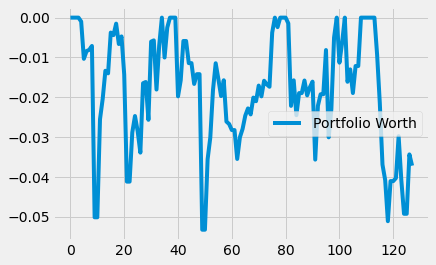

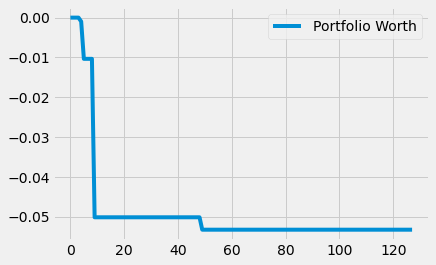

In [53]:

NW1 = DataFrame(our_values1,columns=['Portfolio Worth'])
window =len(NW1)
Roll_Max = NW1.rolling(window, min_periods=1).max()
Daily_Drawdown = NW1/Roll_Max - 1.0
Max_Daily_Drawdown = Daily_Drawdown.rolling(window, min_periods=1).min()
Daily_Drawdown.plot()
Max_Daily_Drawdown.plot()

In [54]:
new_df.head()

,High,Low,Open,Close,Volume,Adj Close,SMA_5,STD_5,Upper_5,Lower_5,SMA_10,Signal_1,Signal_2
Date,,,,,,,,,,,,,
2019-01-15,30.600000,30.23,30.520000,30.600000,26735400.0,27.392029,30.518,0.287089,30.876862,30.159139,30.422,1,0.5
2019-01-16,30.750000,30.35,30.530001,30.559999,24494400.0,27.356222,30.610,0.169116,30.821395,30.398605,30.524,1,0.5
2019-01-17,30.750000,30.41,30.549999,30.639999,26267000.0,27.427834,30.658,0.122148,30.810685,30.505315,30.630,1,0.5
2019-01-18,31.030001,30.52,30.820000,30.959999,43249100.0,27.714287,30.676,0.161493,30.877866,30.474134,30.692,0,0.0
2019-01-22,30.990000,30.42,30.920000,30.580000,37658500.0,27.374126,30.668,0.165891,30.875364,30.460636,30.661,1,0.5


In [55]:
current_shares = 0
our_values2 = []
current_value = 1000
can_buy = 1 
#0 means cannot buy, 1 means can buy
can_sell = 0
#0 means cannot sell, 1 means can sell

for index,row in new_df.iloc[:189,:].iterrows():

  if can_buy == 0:
    print("Held")
    print(current_value)
    current_value = row['Close']*current_shares
    our_values2.append(current_value)
    if can_sell ==0:
      print("Did nothing")

  if row['Signal_2'] == 0 and can_buy==1:
    can_buy = 0
    can_sell = 1
    current_shares = current_value/row['Open']
    print("Bought Shares")

  if row['Signal_2'] == 1 and can_sell ==1:
    can_sell = 0
    can_buy = 1
    current_value = row['Close']*current_shares
    print("Sold Shares")
    print(current_value)
    our_values2.append(current_value)

Bought Shares
Held
1000
Held
992.2128561487797
Held
1002.2712425540996
Held
992.8618002747276
Held
994.8085707658531
Held
995.1330428288271
Held
996.106459017749
Sold Shares
952.952664829704
Bought Shares
Held
952.952664829704
Held
960.3623564202732
Held
961.3288619767064
Held
959.7180808300129
Held
981.6249870829093
Held
986.7795604891628
Held
993.8671450082828
Held
993.2228079706606
Held
1003.5319547831676
Held
1002.8876177455454
Held
1005.7870729674833
Held
1000.6324995612298
Held
1002.5655106740963
Sold Shares
992.9006394518495
Bought Shares
Held
992.9006394518495
Held
1014.4278258006331
Held
1002.8363076529284
Held
1002.8363076529284
Held
1015.7526068283913
Held
1020.0580188305336
Held
1016.083802085331
Held
1010.4536090554304
Held
1028.6689060038543
Held
1029.0001012607938
Held
1019.0644962287511
Held
1039.5980968067158
Held
1039.9292920636553
Held
1027.0129928881925
Held
1038.6045742049332
Held
1058.1446521811156
Held
1047.5465934661572
Held
1055.495153294635
Held
1059.138174782

In [56]:
df_our_values2 = DataFrame(our_values2)

In [57]:
df_our_values2.mean()

0    1097.944816
dtype: float64

In [58]:

df_our_values2_r =df_our_values2.pct_change()
df_our_values2_r.mean()/df_our_values2_r.std()


0    0.150766
dtype: float64

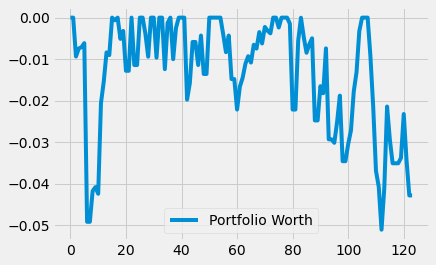

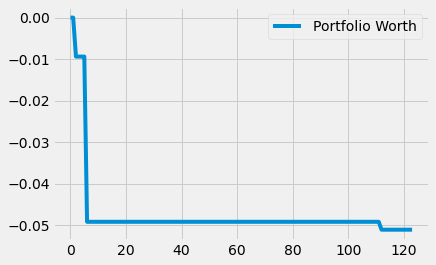

In [59]:
NW2 = DataFrame(our_values2,columns=['Portfolio Worth'])
window =len(NW2)
Roll_Max = NW2.rolling(window, min_periods=1).max()
Daily_Drawdown = NW2/Roll_Max - 1.0
Max_Daily_Drawdown = Daily_Drawdown.rolling(window, min_periods=1).min()
Daily_Drawdown.plot()
Max_Daily_Drawdown.plot()

In [60]:
new_df['Signal_3']= new_df['Signal_1'] + new_df['Signal_2']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
current_shares = 0
our_values3 = []
current_value = 1000
can_buy = 1 
#0 means cannot buy, 1 means can buy
can_sell = 0
#0 means cannot sell, 1 means can sell

for index,row in new_df.iloc[:189,:].iterrows():

  if can_buy == 0:
    print("Held")
    print(current_value)
    our_values3.append(current_value)
    current_value = row['Close']*current_shares
    if can_sell ==0:
      print("Did nothing")

  if row['Signal_3'] < 1 and can_buy==1:
    can_buy = 0
    can_sell = 1
    current_shares = current_value/row['Open']
    print("Bought Shares")

  if row['Signal_3'] >= 1 and can_sell ==1:
    can_sell = 0
    can_buy = 1
    current_value = row['Close']*current_shares
    print("Sold Shares")
    print(current_value)
    our_values3.append(current_value)


Bought Shares
Held
1000
Sold Shares
992.2128561487797
Bought Shares
Held
992.2128561487797
Held
1009.0300232021489
Held
995.9126534292892
Held
996.5852913555991
Held
994.2308982325117
Held
990.5311651044033
Held
993.8945471931561
Held
999.2760355180421
Held
1002.6394817591962
Held
1003.6485348772628
Sold Shares
1001.9668438328863
Bought Shares
Held
1001.9668438328863
Held
994.9577156593876
Held
998.6291667817391
Held
999.9641994056611
Held
1008.6421342742859
Held
1022.3265528891842
Held
1010.6447787015111
Sold Shares
1010.6447787015111
Bought Shares
Held
1010.6447787015111
Sold Shares
1011.8998770427115
Bought Shares
Held
1011.8998770427115
Held
1016.0171872680626
Sold Shares
1016.6505080873734
Bought Shares
Held
1016.6505080873734
Held
1030.3304084017977
Held
1032.9996556914446
Held
1027.327560885836
Held
1021.6554024403521
Held
1024.324649729999
Held
1020.6544108417813
Held
1018.652491284515
Sold Shares
1010.9783496418896
Bought Shares
Held
1010.9783496418896
Held
1022.6679037443424


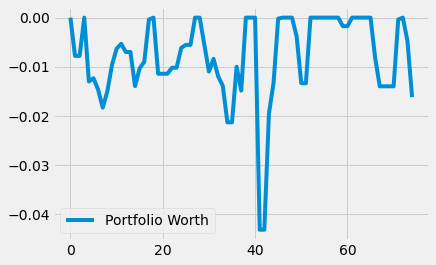

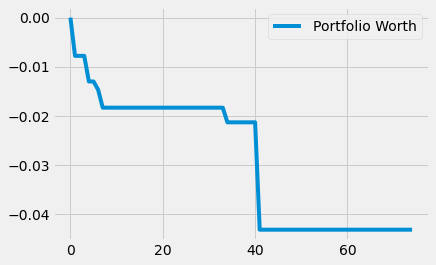

In [62]:
NW3 = DataFrame(our_values3,columns=['Portfolio Worth'])
window =len(NW3)
Roll_Max = NW3.rolling(window, min_periods=1).max()
Daily_Drawdown = NW3/Roll_Max - 1.0
Max_Daily_Drawdown = Daily_Drawdown.rolling(window, min_periods=1).min()
Daily_Drawdown.plot()
Max_Daily_Drawdown.plot()

In [63]:
df_our_values3 = DataFrame(our_values3)

In [64]:
df_our_values3.mean()

0    1061.409606
dtype: float64

In [65]:
df_our_values3_r =df_our_values3.pct_change()
df_our_values3_r.mean()/df_our_values3_r.std()


0    0.221921
dtype: float64

In [66]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
df = new_df.iloc[:,11:]
df.head()

,Signal_1,Signal_2,Signal_3
Date,,,
2019-01-15,1,0.5,1.5
2019-01-16,1,0.5,1.5
2019-01-17,1,0.5,1.5
2019-01-18,0,0.0,0.0
2019-01-22,1,0.5,1.5


In [67]:
def encode_units(x): 
    if x < 1:
        return 0 
    if x >= 1:
        return 1
df_a = df.applymap(encode_units)

In [68]:
df_a.head()

,Signal_1,Signal_2,Signal_3
Date,,,
2019-01-15,1,0,1
2019-01-16,1,0,1
2019-01-17,1,0,1
2019-01-18,0,0,0
2019-01-22,1,0,1


In [69]:
frequent_itemsets = apriori(df_a, min_support=0.07, use_colnames=True)

In [70]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [71]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Signal_1),(Signal_3),0.641975,0.699588,0.641975,1.000000,1.429412,0.192857,inf
1,(Signal_3),(Signal_1),0.699588,0.641975,0.641975,0.917647,1.429412,0.192857,4.347443
2,(Signal_3),(Signal_2),0.699588,0.098765,0.098765,0.141176,1.429412,0.029670,1.049383
3,(Signal_2),(Signal_3),0.098765,0.699588,0.098765,1.000000,1.429412,0.029670,inf
